<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Razonamiento_Aproximado_EvolSearch_SimultaneousEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple evolutionary algorithm to test oerators

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import time

The cost function is a set of simultaneous equations thatneed to be solved so all are equal to 0

In [ ]:
def EvalFuns (x,y,z):

# Equs to be 0
  Eq1 = x + 2*y - 3*z + 7
  Eq2 = 3*x - y + 7*z + 20
  Eq3 = 7*x - 3*y - z - 6
  # Eq4 = x + y + z -3
  # Eq3 = 0

  # Return the total error
  return ( (abs(Eq1) + abs(Eq2) + abs(Eq3)) )

Call the cost function for each individual in a population

In [ ]:
def EvalPop (ep_pop_size, ep_pop_individuals):

  # Save space to save the results from the evaluation of the whole population
  # (index of individual in the population array and its fitness)
  fit_popFit = np.zeros((ep_pop_size,2))

  # Process the whole population
  for i in range(ep_pop_size):
    fit_calculated = EvalFuns(ep_pop_individuals[i][0],ep_pop_individuals[i][1],ep_pop_individuals[i][2])
    fit_popFit[i][0] = i
    fit_popFit[i][1] = fit_calculated

  # return (fit_bestI, fit_aveF)
  return (fit_popFit)


Set variables and parameters for the search

In [ ]:
# Set the generation parameters and create required variables
gen_maxGen = 50
# Set a variable to kepp a record of the evolution for later analtses, for each
# generation save: best fitness, best individial's 3 values, average fitness
gen_log = np.zeros((gen_maxGen, 5))


# Initial population parameters
pop_iniMinVal = -50
pop_iniMaxVal = 50
pop_size = 120 # 1564000  1200

# set status of elitist (1 or 0!!)
pop_eliteN = 1

# set mutation percentage (in population) and rate (per individual)
pop_mutateN = int(pop_size * 0.3)
mutMaxV = 0.1
mutMinV = -0.1
# cap number of individuals to population max size (so 100% mutation can be used safely)
pop_mutateN = min(pop_mutateN, (pop_size - pop_eliteN))

# set crossover (not really used, is by default the remainder of required individuals)
pop_crossN = pop_size - (pop_eliteN + pop_mutateN)

# Create the population structure and the intitial random population
pop_individuals = np.random.rand(pop_size,3)
pop_individuals = pop_individuals * (pop_iniMaxVal - pop_iniMinVal)
pop_individuals = pop_individuals + pop_iniMinVal

# Buffer to save the new generation while creating it
# pop_newGenpop = np.zeros((pop_size,3))


Start Evolution

The selection is done by randomly choosing an individual in the ranked fitness table. The distribution 'random.triangle()' is configured to create a decreasing propbability of choosing larger indices... so beter individuals have higher chance.

In [ ]:
# Start evolution, iterating over generations, starting at Gen 0
gen_currentG = 0

# Initilaise a variable so save the best fitness found across generations (inc.
# in which generation in which was found), set error to a "large" value
best_BestFound = np.empty(2)
best_BestFound[0] = 100.1        # in col[0] we'll save the error / fitness
best_BestFound[1] = 0            # in col[1] we'll save the generation

while gen_currentG < gen_maxGen :

  # Buffer to save the new generation (population) while creating it
  pop_newGenpop = np.zeros((pop_size,3))

  # Evaluate fitness of all individuals in the population and rank by fitness (lower to larger error)
  pop_genFit = EvalPop(pop_size, pop_individuals)
  pop_genRank = pop_genFit[pop_genFit[:, 1].argsort()]

  # Follow evolution and save the log data for analysis
  gen_log[gen_currentG, 0] = pop_genRank[0,1]                          # Best fitness this generation
  gen_log[gen_currentG, 1] = pop_individuals[int(pop_genRank[0,0]),0]  # x for best individual
  gen_log[gen_currentG, 2] = pop_individuals[int(pop_genRank[0,0]),1]  # y for best individual
  gen_log[gen_currentG, 3] = pop_individuals[int(pop_genRank[0,0]),2]  # z for best individual
  gen_log[gen_currentG, 4] = np.sum(pop_genRank, axis=0)[1]/pop_size   # Average fitness of population

  print ("Gen's ", gen_currentG, "best fitnes is ", pop_genRank[0,1], "and average is ", gen_log[gen_currentG, 4])

  # Save when best so far has been found (in which generation)
  if best_BestFound[0] > pop_genRank[0,1] :
    best_BestFound[0] = pop_genRank[0,1]
    best_BestFound[1] = gen_currentG

  # Create the new generation, index to count how many so far
  newGenPopI = 0

  # Save a number of elite individuals, best N
  while newGenPopI < pop_eliteN :
    pop_newGenpop[newGenPopI,:] = pop_individuals[int(pop_genRank[newGenPopI][0]),:]
    newGenPopI = newGenPopI + 1
  
  # Create new individuals through mutation
  while newGenPopI < (pop_eliteN + pop_mutateN) :
    chosen = int(random.triangular(0, pop_size, 0))
    mutIdx = random.randint(0, 2)
    newIndiM = pop_individuals[int(pop_genRank[chosen][0]), :]
    newIndiM[mutIdx] = newIndiM[mutIdx] * (1 + random.uniform(mutMinV, mutMaxV))
    pop_newGenpop[newGenPopI,:] = newIndiM
    newGenPopI = newGenPopI + 1

  # Create new individuals through crossover
  # Create one from the x, y and z from 3 parents
  while newGenPopI < pop_size :
    chosen0 = int(random.triangular(0, pop_size, 0))
    chosen1 = int(random.triangular(0, pop_size, 0))
    chosen2 = int(random.triangular(0, pop_size, 0))
    pop_newGenpop[newGenPopI,0] = pop_individuals[int(pop_genRank[chosen0][0]), 0]
    pop_newGenpop[newGenPopI,1] = pop_individuals[int(pop_genRank[chosen1][0]), 1]
    pop_newGenpop[newGenPopI,2] = pop_individuals[int(pop_genRank[chosen2][0]), 2]
    newGenPopI = newGenPopI + 1

  # replace the population with the next generation and repeat to timeout
  pop_individuals = pop_newGenpop
  gen_currentG = gen_currentG + 1


Gen's  0 best fitnes is  92.56262361346819 and average is  495.28194988732497
Gen's  1 best fitnes is  30.67083675891191 and average is  383.7487691418268
Gen's  2 best fitnes is  30.6158180644658 and average is  313.2267382503166
Gen's  3 best fitnes is  30.6158180644658 and average is  246.57361940208614
Gen's  4 best fitnes is  30.160693935799305 and average is  185.81693432602893
Gen's  5 best fitnes is  24.50668789465467 and average is  141.03778738109028
Gen's  6 best fitnes is  10.592856929648878 and average is  116.97936551034667
Gen's  7 best fitnes is  8.762154008879925 and average is  85.21367377508189
Gen's  8 best fitnes is  5.08625291886588 and average is  66.82798238556516
Gen's  9 best fitnes is  4.468306762887732 and average is  52.876485460043185
Gen's  10 best fitnes is  4.468306762887732 and average is  39.51963745047228
Gen's  11 best fitnes is  4.468306762887732 and average is  32.63013185336122
Gen's  12 best fitnes is  2.3975587447587454 and average is  28.45998

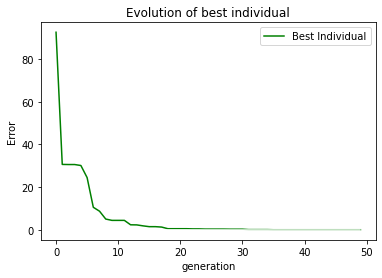

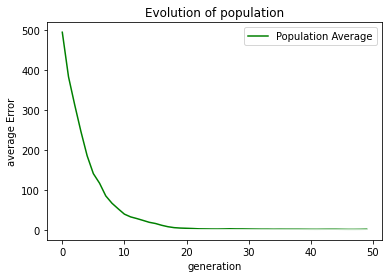

In [ ]:
# Plot evolution of Best and avarage fitness for every generation

plt.plot(np.arange(0, gen_maxGen, 1), gen_log[:,0], 'g', linewidth=1.5, label='Best Individual')
plt.plot(np.arange(0, gen_maxGen, 1), np.zeros(gen_maxGen), 'w', linewidth=1.5)
plt.xlabel("generation")
_ = plt.ylabel("Error")
plt.title('Evolution of best individual')
plt.legend()
plt.show()

plt.plot(np.arange(0, gen_maxGen, 1), gen_log[:,4], 'g', linewidth=1.5, label='Population Average')
plt.plot(np.arange(0, gen_maxGen, 1), np.zeros(gen_maxGen), 'w', linewidth=1.5)
plt.xlabel("generation")
_ = plt.ylabel("average Error")
plt.title('Evolution of population')
plt.legend()
plt.show()


In [ ]:
# Results of this run:

print("Best solution found:\nError: ", gen_log[49,0], "\nFor x,y,z = ", gen_log[49][1:4])
print("Best solution found in generation ", int(best_BestFound[1])+1, 'of ', gen_currentG )

Best solution found:
Error:  0.08695415225274505 
For x,y,z =  [-2.3236495  -6.50010535 -2.78437069]
Best solution found in generation  36 of  50


Now try different combinations of parameteres, e.g.:
*   Number of Generations
*   Number of individuals in a population
*   Percentage of Mutation vs Crossover
*   Amount of mutation

Can you check as well how much resources would it be saved (if any at all...) compared to a random search?



# ***Librería deap***